In [109]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from collections import defaultdict

from transformers import DecisionTransformerConfig

#
import warnings
warnings.filterwarnings('ignore')

In [110]:
DIR = "./eval-outputs-pipeline/round4"
# DIR = "./eval-outputs/low-target/"
PROJECT = "ARDT-Internal"
# PROJECT = "Experiment-2"

MODEL_TYPES = ['dt', 'ardt-simplest', 'ardt-vanilla', 'ardt-full']
WITH_NO_ADV = False
IS_OMNI = False

In [111]:
results_paths = sorted([DIR + "/" + r for r in os.listdir(DIR) if os.path.isdir(os.path.join(DIR, r))])

In [113]:
models_to_results = defaultdict(list)

for i, path in enumerate(results_paths):
    model_name = path.split("/")[-1][:-10]
    model_config = DecisionTransformerConfig.from_pretrained(f"{PROJECT}/" + path.split("/")[-1], use_auth_token=True)
    done = False
    for t in MODEL_TYPES:
        if model_name.startswith(t + "-"):
            done = True
            model_type = t
            models_to_results['type'].append(model_type)
            models_to_results['type'].append(model_type)
            models_to_results['type'].append(model_type)
            models_to_results['type'].append(model_type)
    if not done: continue
    models_to_results['name'].append(model_name)
    models_to_results['name'].append(model_name)
    models_to_results['name'].append(model_name)
    models_to_results['name'].append(model_name)
    models_to_results['number'].append(i)
    models_to_results['number'].append(i)
    models_to_results['number'].append(i)
    models_to_results['number'].append(i)
    models_to_results['lambda1'].append(model_config.lambda1)
    models_to_results['lambda1'].append(model_config.lambda1)
    models_to_results['lambda1'].append(model_config.lambda1)
    models_to_results['lambda1'].append(model_config.lambda1)
    models_to_results['lambda2'].append(model_config.lambda2)
    models_to_results['lambda2'].append(model_config.lambda2)
    models_to_results['lambda2'].append(model_config.lambda2)
    models_to_results['lambda2'].append(model_config.lambda2)
    dataset = model_name.split("-")[-1]
    models_to_results['dataset'].append(dataset)
    models_to_results['dataset'].append(dataset)
    models_to_results['dataset'].append(dataset)
    models_to_results['dataset'].append(dataset)
    model_id = f"{model_type} | {dataset} | l1 = {model_config.lambda1} | l2 = {model_config.lambda2}"
    models_to_results['id'].append(model_id)
    models_to_results['id'].append(model_id)
    models_to_results['id'].append(model_id)
    models_to_results['id'].append(model_id)
    models_to_results['id_no_space'].append(model_id)
    models_to_results['id_no_space'].append(model_id)
    models_to_results['id_no_space'].append(model_id)
    models_to_results['id_no_space'].append(model_id)
    model_id_short = f"{model_type} | {dataset}"
    models_to_results['id_short'].append(model_id_short)
    models_to_results['id_short'].append(model_id_short)
    models_to_results['id_short'].append(model_id_short)
    models_to_results['id_short'].append(model_id_short)

    model_returns = []
    model_returns_means = []
    model_returns_medians = []
    model_returns_mins = []
    for subpath in os.listdir(path):
        if WITH_NO_ADV and subpath.startswith("zeroagent"): continue
        if IS_OMNI and not subpath.endswith("omni.json"): continue
        if not IS_OMNI and subpath.endswith("omni.json"): continue
        with open(path + "/" + subpath, "rb") as f:
            model_adv_returns = json.load(f)['ep_return']
        model_returns.extend(model_adv_returns)
        model_returns_medians.append(np.median(model_adv_returns))
        model_returns_means.append(np.mean(model_adv_returns))
        model_returns_mins.append(np.min(model_adv_returns))

    models_to_results['returns'].append(int(np.mean(model_returns_means)))
    models_to_results['returns'].append(int(np.min(model_returns_mins)))
    models_to_results['returns'].append(int(np.median(model_returns_medians)))
    models_to_results['returns'].append(model_returns)
    models_to_results['return_types'].append("mean_returns")
    models_to_results['return_types'].append("min_returns")
    models_to_results['return_types'].append("median_returns")
    models_to_results['return_types'].append("all_returns")

def get_length(length, max_length, part, nparts=4):
    multiple = 0.65 if (part % nparts) == 0 else (0.90 if (part % nparts) == 1 else 0)
    return max_length if length == max_length else max_length + int((max_length - length) * multiple)

parts = [s.split("|") for s in models_to_results['id']]
counts = [i for i in range(len(parts[0]))]
max_lengths = [max(len(part[i]) for part in parts) for i in range(len(parts[0]))]
aligned_strings = ["|".join(part.ljust(get_length(len(part), max_length, ct)) for part, max_length, ct in zip(parts[i], max_lengths, counts)) for i in range(len(parts))]
models_to_results['id'] = aligned_strings
models_to_results['id']

['ardt-full       | dataset_combo_train_halfcheetah_special | l1 = 5.0 | l2 = 500.0',
 'ardt-full       | dataset_combo_train_halfcheetah_special | l1 = 5.0 | l2 = 500.0',
 'ardt-full       | dataset_combo_train_halfcheetah_special | l1 = 5.0 | l2 = 500.0',
 'ardt-full       | dataset_combo_train_halfcheetah_special | l1 = 5.0 | l2 = 500.0',
 'ardt-simplest | dataset_combo_train_halfcheetah_special | l1 = 1.0 | l2 = 1.0  ',
 'ardt-simplest | dataset_combo_train_halfcheetah_special | l1 = 1.0 | l2 = 1.0  ',
 'ardt-simplest | dataset_combo_train_halfcheetah_special | l1 = 1.0 | l2 = 1.0  ',
 'ardt-simplest | dataset_combo_train_halfcheetah_special | l1 = 1.0 | l2 = 1.0  ',
 'dt                   | dataset_combo_train_halfcheetah_special | l1 = 1.0 | l2 = 1.0  ',
 'dt                   | dataset_combo_train_halfcheetah_special | l1 = 1.0 | l2 = 1.0  ',
 'dt                   | dataset_combo_train_halfcheetah_special | l1 = 1.0 | l2 = 1.0  ',
 'dt                   | dataset_combo_train_ha

In [114]:
datasets = sorted(list(set([m for m in models_to_results['dataset']])))
datasets

['dataset_combo_train_halfcheetah_special']

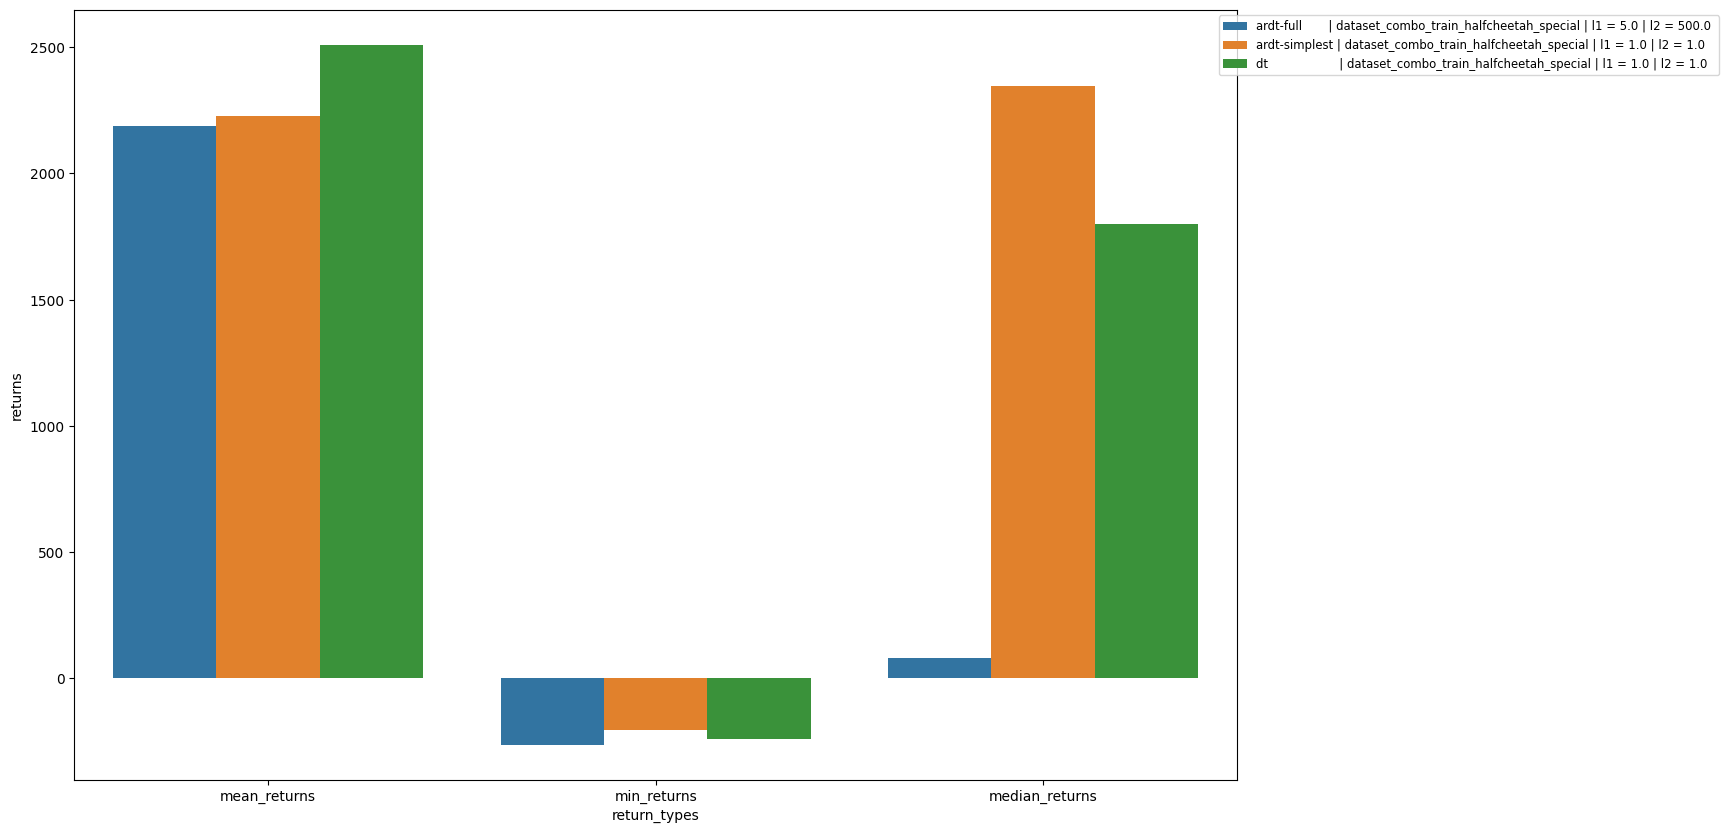

In [115]:
filter_by_dataset = False  # FIXME

plt.figure(figsize=(15, 10))
df = pd.DataFrame.from_dict(models_to_results)
df = df.sort_values(by=['dataset', 'id'])
plt_df = df[df['return_types'] != 'all_returns']
if filter_by_dataset:
    dataset_idx = 0  # FIXME
    dataset = datasets[dataset_idx]
    plt_df = plt_df[plt_df['dataset'] == dataset]
sns.barplot(data=plt_df, x="return_types", y="returns", hue="id")
plt.legend(fontsize='small', loc='upper right', bbox_to_anchor=(1.42, 1))
plt.show();

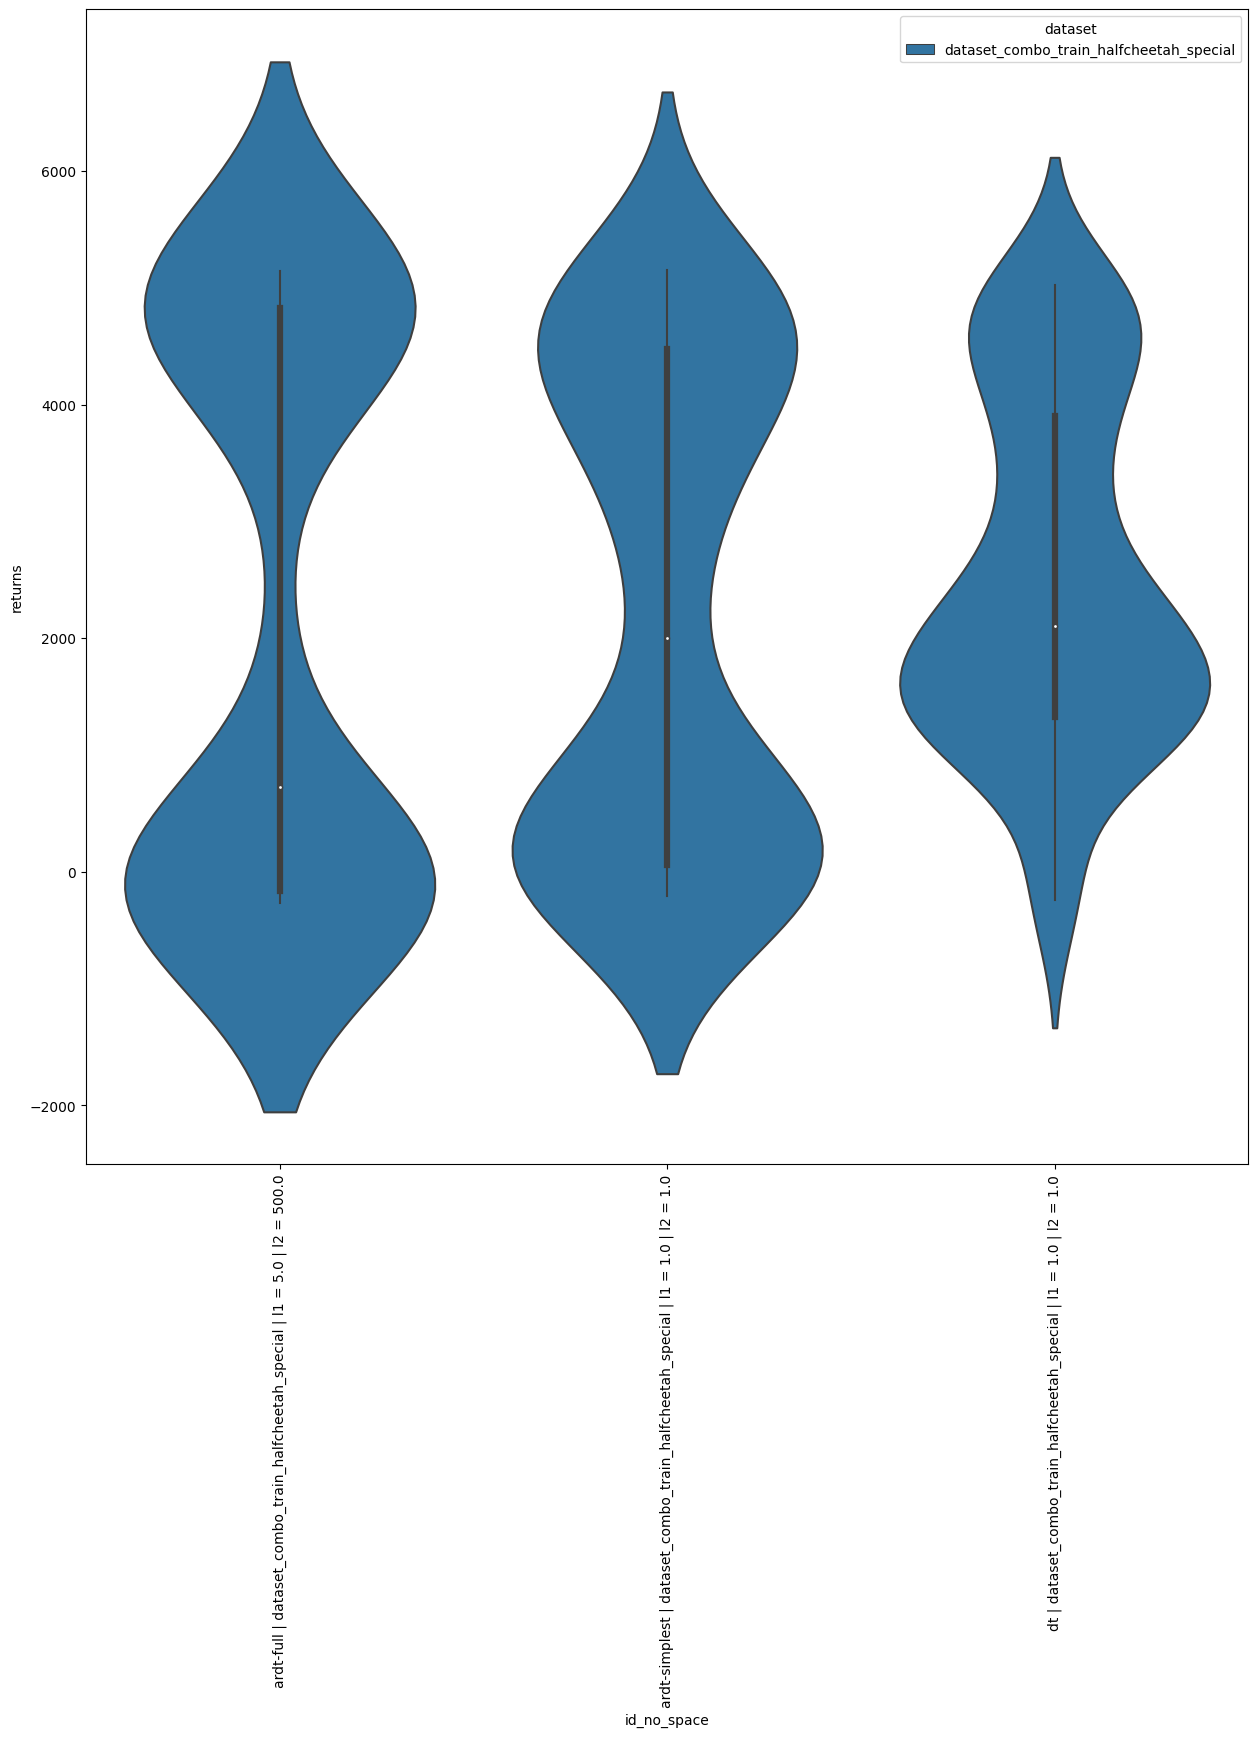

In [116]:
filter_by_dataset = False  # FIXME

plt.figure(figsize=(15, 15))
df = pd.DataFrame.from_dict(models_to_results)
df = df.sort_values(by=['dataset', 'name'])
plt_df = df[df['return_types'] == 'all_returns']
plt_df = plt_df.explode('returns')
plt_df['returns'] = plt_df['returns'].astype(float)
if filter_by_dataset:
    dataset_idx = 0  # FIXME
    dataset = datasets[dataset_idx]
    plt_df = plt_df[plt_df['dataset'] == dataset]
sns.violinplot(data=plt_df, x="id_no_space", y="returns", hue="dataset", palette="tab20")
plt.xticks(rotation=90)
plt.show();

In [120]:
IS_MIN = True
models_to_results_two = defaultdict(list)

for i, path in enumerate(results_paths):
    model_name = path.split("/")[-1][:-10]
    model_config = DecisionTransformerConfig.from_pretrained(PROJECT + "/" + path.split("/")[-1], use_auth_token=True)
    done = False
    for type in MODEL_TYPES:
        if model_name.startswith(type + "-"):
            done = True
            model_type = type
            models_to_results_two['type'].append(model_type)
            models_to_results_two['type'].append(model_type)
    if not done: continue
    models_to_results_two['name'].append(model_name)
    models_to_results_two['name'].append(model_name)
    models_to_results_two['number'].append(i)
    models_to_results_two['number'].append(i)
    models_to_results_two['lambda1'].append(model_config.lambda1)
    models_to_results_two['lambda1'].append(model_config.lambda1)
    models_to_results_two['lambda2'].append(model_config.lambda2)
    models_to_results_two['lambda2'].append(model_config.lambda2)
    dataset = model_name.split("-")[-1]
    models_to_results_two['dataset'].append(dataset)
    models_to_results_two['dataset'].append(dataset)
    model_id = f"{model_type} | {dataset} | l1 = {model_config.lambda1} | l2 = {model_config.lambda2}"
    models_to_results_two['id'].append(model_id)
    models_to_results_two['id'].append(model_id)
    models_to_results_two['id_no_space'].append(model_id)
    models_to_results_two['id_no_space'].append(model_id)
    model_id_short = f"{model_type} | {dataset}"
    models_to_results_two['id_short'].append(model_id_short)
    models_to_results_two['id_short'].append(model_id_short)

    model_returns = []
    model_returns_means = []
    model_returns_mins = []
    for subpath in os.listdir(path):
        if subpath.startswith("zeroagent"): continue
        if IS_OMNI and not subpath.endswith("omni.json"): continue
        if not IS_OMNI and subpath.endswith("omni.json"): continue
        with open(path + "/" + subpath, "rb") as f:
            model_adv_returns = json.load(f)['ep_return']
        model_returns.append(model_adv_returns)
        model_returns_means.append(np.mean(model_adv_returns))
        model_returns_mins.append(np.min(model_adv_returns))

    if not IS_MIN:
        models_to_results_two['returns'].append(int(np.mean(model_returns_means)))
        models_to_results_two['return_types'].append("mean_returns_adv")
    else:
        models_to_results_two['returns'].append(int(np.min(model_returns_means)))
        models_to_results_two['return_types'].append("min_returns_adv")

    model_returns = []
    model_returns_means = []
    model_returns_mins = []
    for subpath in os.listdir(path):
        if not subpath.startswith("zeroagent"): continue
        with open(path + "/" + subpath, "rb") as f:
            model_noadv_returns = json.load(f)['ep_return']
        model_returns.append(model_noadv_returns)
        model_returns_means.append(np.mean(model_noadv_returns))
        model_returns_mins.append(np.min(model_noadv_returns))

    if not IS_MIN:
        models_to_results_two['returns'].append(int(np.mean(model_returns_means)))
        models_to_results_two['return_types'].append("mean_returns_noadv")
    else:
        models_to_results_two['returns'].append(int(np.min(model_returns_means)))
        models_to_results_two['return_types'].append("min_returns_noadv")

def get_length(length, max_length, part, nparts=4):
    multiple = 0.65 if (part % nparts) == 0 else (0.90 if (part % nparts) == 1 else 0)
    return max_length if length == max_length else max_length + int((max_length - length) * multiple)

parts = [s.split("|") for s in models_to_results_two['id']]
counts = [i for i in range(len(parts[0]))]
max_lengths = [max(len(part[i]) for part in parts) for i in range(len(parts[0]))]
aligned_strings = ["|".join(part.ljust(get_length(len(part), max_length, ct)) for part, max_length, ct in zip(parts[i], max_lengths, counts)) for i in range(len(parts))]
models_to_results_two['id'] = aligned_strings
models_to_results_two['id']

['ardt-full       | dataset_combo_train_halfcheetah_special | l1 = 5.0 | l2 = 500.0',
 'ardt-full       | dataset_combo_train_halfcheetah_special | l1 = 5.0 | l2 = 500.0',
 'ardt-simplest | dataset_combo_train_halfcheetah_special | l1 = 1.0 | l2 = 1.0  ',
 'ardt-simplest | dataset_combo_train_halfcheetah_special | l1 = 1.0 | l2 = 1.0  ',
 'dt                   | dataset_combo_train_halfcheetah_special | l1 = 1.0 | l2 = 1.0  ',
 'dt                   | dataset_combo_train_halfcheetah_special | l1 = 1.0 | l2 = 1.0  ']

In [121]:
datasets = sorted(list(set([m for m in models_to_results_two['dataset']])))
datasets

['dataset_combo_train_halfcheetah_special']

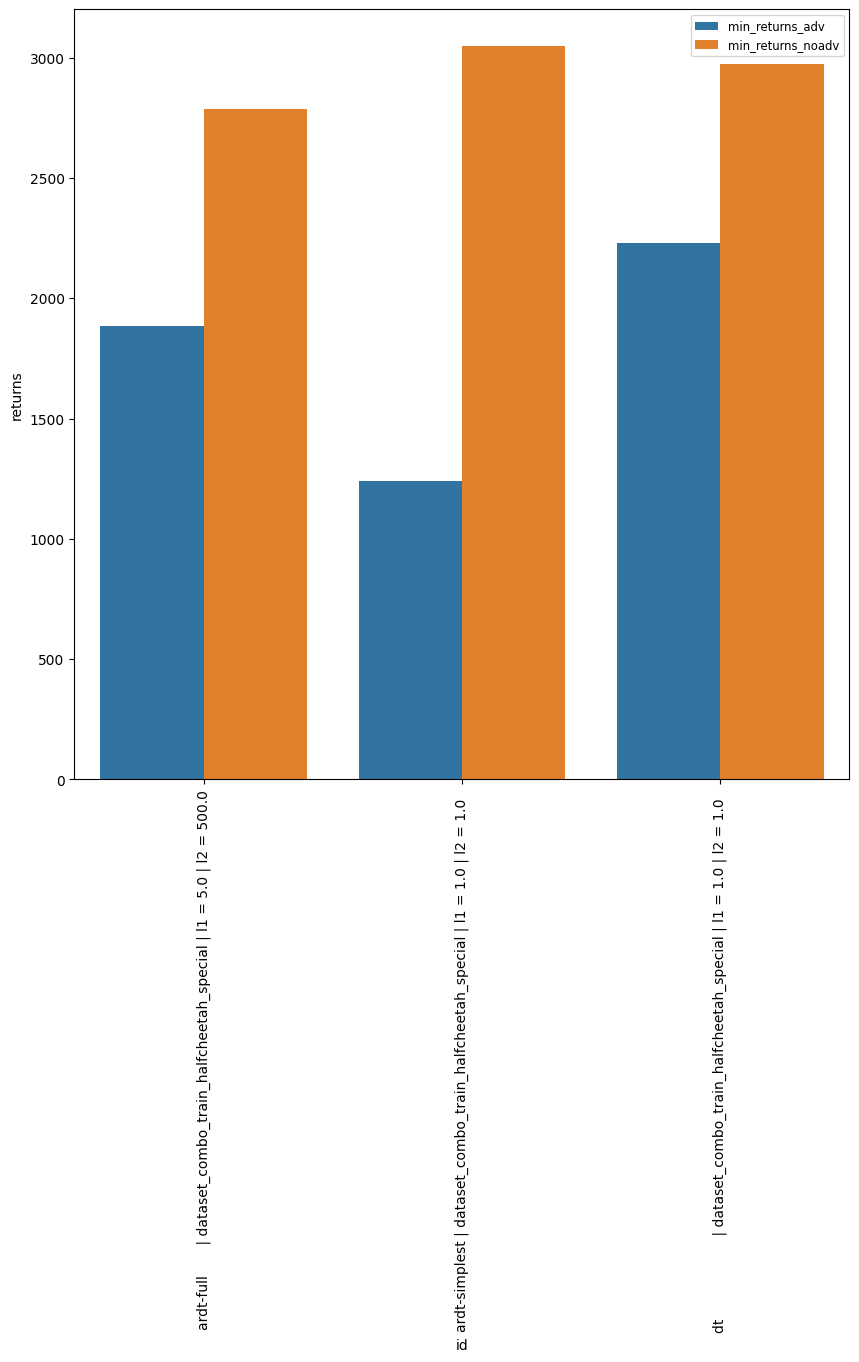

In [123]:
filter_by_dataset = False  # FIXME

plt.figure(figsize=(10, 10))
df = pd.DataFrame.from_dict(models_to_results_two)
df = df.sort_values(by=['dataset', 'id'])
if filter_by_dataset:
    dataset_idx = 0  # FIXME
    dataset = datasets[dataset_idx]
    plt_df = df[df['dataset'] == dataset]
else:
    plt_df = df
sns.barplot(data=plt_df, x="id", y="returns", hue="return_types")
plt.xticks(rotation=90)
plt.legend(fontsize='small', loc='upper right', bbox_to_anchor=(1, 1))
plt.show();